SEGMENTACION DE CLIENTES CON MODELO RFM
- Acercamiento que agrupa a los clientes basados en similitudes : comportamientos, preferencias
- Permite al negocio entender la base de sus clientes de mejor manera
- algoritmo k-means, DBSCAN, Clustering Jerarquico

1.- CARGA DE LIBRERIAS

In [1]:
###############################
#librerias manejo de estructuras de datos
import numpy as np
import pandas as pd

###############################
#Librerias para graficar
import matplotlib.pyplot as plt
import seaborn          as sns

###############################
#Librerias manejo de fechas, años , dias ,resta entre
import datetime as dt

###############################
#Librerias para tratamiento de datos escalamiento, estandarización, pipelines
# modelamientos, seleccion de modelos
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



2.- CARGA DE ARCHIVOS

In [2]:
ventas = pd.read_excel('F:/CAPACITACION/MODELO MLEARNING/recursos/online_retail_II.xlsx')

3.- REVISION DE DATOS . DESCRIPCION

In [3]:
ventas.shape

(525461, 8)

In [4]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
ventas.describe()

Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000            2010-03-21 12:20:00       1.250000   
50%         3.000000            2010-07-06 09:51:00       2.100000   
75%        10.000000            2010-10-15 12:45:00       4.210000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       107.424110                            NaN     146.126914   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316

In [6]:
variables_object = ventas.select_dtypes(include='object').columns
variables_numericas = ventas.select_dtypes(include=[float, int]).columns

#4.- RECONFIGURANDO LOS TIPOS DE DATOS. SOBRE TODO, TIPOS FECHAS

In [7]:
ventas['InvoiceDate'] = pd.to_datetime(ventas['InvoiceDate'])

In [8]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [9]:
ventas.describe()

Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000            2010-03-21 12:20:00       1.250000   
50%         3.000000            2010-07-06 09:51:00       2.100000   
75%        10.000000            2010-10-15 12:45:00       4.210000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       107.424110                            NaN     146.126914   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316

In [10]:
ventas.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [11]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


# 6.- BORRANDO COLUMNAS/VARIABLES TIPO 'object' No contribuyen

In [12]:
ventas_filtrado = ventas.drop(columns=variables_object)

In [13]:
ventas_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     525461 non-null  int64         
 1   InvoiceDate  525461 non-null  datetime64[ns]
 2   Price        525461 non-null  float64       
 3   Customer ID  417534 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 16.0 MB


# 9.- REVISANDO NULOS - BORRANDO NULOS - FILAS

In [14]:
ventas_filtrado.isnull().sum()

Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
dtype: int64

In [15]:
ventas_filtrado.isna().sum()

Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
dtype: int64

In [16]:
ventas_filtrado.dropna(inplace=True)

In [17]:
ventas_filtrado.isna().sum()

Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
dtype: int64

# 10. - REVISANDO VALORES RAROS, NEGATIVOS, MUY ALTOS, MUY BAJOS - PROCESARLOS.

In [18]:
ventas_filtrado.describe()

Quantity                    InvoiceDate          Price  \
count  417534.000000                         417534  417534.000000   
mean       12.758815  2010-07-01 01:12:19.787609856       3.887547   
min     -9360.000000            2009-12-01 07:45:00       0.000000   
25%         2.000000            2010-03-26 11:26:00       1.250000   
50%         4.000000            2010-07-08 19:12:00       1.950000   
75%        12.000000            2010-10-14 14:08:00       3.750000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       101.220424                            NaN      71.131797   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316

In [19]:
ventas_filtrado[ventas_filtrado['Quantity']<=0]

Quantity         InvoiceDate  Price  Customer ID
178          -12 2009-12-01 10:33:00   2.95      16321.0
179           -6 2009-12-01 10:33:00   1.65      16321.0
180           -4 2009-12-01 10:33:00   4.25      16321.0
181           -6 2009-12-01 10:33:00   2.10      16321.0
182          -12 2009-12-01 10:33:00   2.95      16321.0
...          ...                 ...    ...          ...
524695        -2 2010-12-09 15:41:00   2.10      12605.0
524696        -4 2010-12-09 15:43:00   0.50      15329.0
524697        -1 2010-12-09 15:43:00   2.95      15329.0
524698        -1 2010-12-09 15:43:00  12.75      15329.0
525282        -1 2010-12-09 17:32:00   1.95      14031.0

[9839 rows x 4 columns]

In [20]:
#Borro las filas que tienen Qauntity <= 0 . Borro las 0, pues distorsionan
ventas_filtrado.drop(ventas_filtrado[ventas_filtrado['Quantity'] <=0].index, inplace = True)

In [21]:
# Veo valor con precios menores a 0
ventas_filtrado[ventas_filtrado['Price']<=0]

Quantity         InvoiceDate  Price  Customer ID
4674          12 2009-12-02 13:34:00    0.0      16126.0
6781           2 2009-12-03 11:19:00    0.0      15658.0
16107          1 2009-12-07 16:38:00    0.0      17231.0
18738          1 2009-12-08 15:25:00    0.0      14108.0
18739         12 2009-12-08 15:25:00    0.0      14108.0
32916          8 2009-12-15 13:49:00    0.0      15070.0
40101         12 2009-12-18 14:22:00    0.0      18071.0
47126         24 2010-01-06 14:54:00    0.0      14258.0
48342         10 2010-01-08 10:43:00    0.0      12417.0
57619         12 2010-01-15 12:43:00    0.0      16858.0
89084          5 2010-02-12 14:58:00    0.0      14103.0
89180          5 2010-02-12 15:47:00    0.0      14827.0
111348         1 2010-03-04 11:44:00    0.0      13047.0
149201         8 2010-04-01 17:13:00    0.0      13047.0
149202         8 2010-04-01 17:13:00    0.0      13047.0
166143         1 2010-04-20 09:56:00    0.0      12623.0
232526         1 2010-06-11 11:12:00    0.0      12748.0
240455         2 2010-06-17 10:12:00    0.0      14045.0
248583         5 2010-06-24 12:34:00    0.0      13089.0
276858         6 2010-07-19 13:13:00    0.0      14025.0
296375         9 2010-08-05 15:28:00    0.0      12471.0
327801         3 2010-09-05 11:58:00    0.0      12647.0
358820       648 2010-09-27 16:59:00    0.0      17450.0
364333         2 2010-09-30 12:19:00    0.0      17667.0
392008        64 2010-10-14 15:33:00    0.0      14646.0
400047         1 2010-10-18 15:13:00    0.0      13554.0
439309         2 2010-11-07 14:26:00    0.0      12820.0
453705         2 2010-11-12 11:41:00    0.0      12647.0
471775         1 2010-11-19 09:40:00    0.0      12647.0
471776         1 2010-11-19 09:40:00    0.0      12647.0
512240         1 2010-12-05 14:02:00    0.0      12647.0

In [22]:
#Borro las filas que tienen Qauntity <= 0 . Borro las 0, pues distorsionan
ventas_filtrado.drop(ventas_filtrado[ventas_filtrado['Price'] <=0].index, inplace = True)

# 11.- REVISANDO INFO, DESCRIBE, SHAPE, ISNULL

In [23]:
ventas_filtrado.describe()

Quantity                    InvoiceDate          Price  \
count  407664.000000                         407664  407664.000000   
mean       13.585585  2010-07-01 10:15:11.871688192       3.294438   
min         1.000000            2009-12-01 07:45:00       0.001000   
25%         2.000000            2010-03-26 14:01:00       1.250000   
50%         5.000000            2010-07-09 15:47:00       1.950000   
75%        12.000000            2010-10-14 17:09:00       3.750000   
max     19152.000000            2010-12-09 20:01:00   10953.500000   
std        96.840747                            NaN      34.757965   

         Customer ID  
count  407664.000000  
mean    15368.592598  
min     12346.000000  
25%     13997.000000  
50%     15321.000000  
75%     16812.000000  
max     18287.000000  
std      1679.762138

In [24]:
ventas_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407664 entries, 0 to 525460
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     407664 non-null  int64         
 1   InvoiceDate  407664 non-null  datetime64[ns]
 2   Price        407664 non-null  float64       
 3   Customer ID  407664 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 15.6 MB


# 13.- CREANDO SEGMENTACION METODO RFM
# AGRUPO RFM POR CLIENTE

# 14.- Verifico si necesito columnas nuevas .
# en este caso, necesito agregar una columna que tenga el total precio¨*cantidad

In [25]:
# Agregando columna precio* cantidad

ventas_filtrado['MontoVenta'] = ventas_filtrado['Quantity']*ventas_filtrado['Price']

# DEbo calcular la máxima fecha de perido en referencia
max_fecha = ventas_filtrado['InvoiceDate'].max()
max_fecha = pd.to_datetime(max_fecha)

ventas_rfm = ventas_filtrado.groupby('Customer ID')
columnas_agregadas = {
                'InvoiceDate'   : lambda x: (max_fecha - x.max()).days + 1,  # Calcular la recencia
                'Customer ID'   : 'count',
                'MontoVenta'    : 'sum' 
                        }
ventas_rfm = ventas_filtrado.groupby('Customer ID').agg(columnas_agregadas)
ventas_rfm.rename(columns={
                    'Customer ID':'frecuency',
                    'MontoVenta' :'monetary',
                    'InvoiceDate':'recency'},
                        inplace= True)

                                                    

In [26]:
ventas_rfm.sort_index()

recency  frecuency  monetary
Customer ID                              
12346.0          165         33    372.86
12347.0            3         71   1323.32
12348.0           74         20    222.16
12349.0           43        102   2671.14
12351.0           11         21    300.93
...              ...        ...       ...
18283.0           18        230    641.77
18284.0           67         28    461.68
18285.0          296         12    427.00
18286.0          112         67   1296.43
18287.0           18         85   2345.71

[4312 rows x 3 columns]

# 15 VErificando datos nuevamente
# info, shape, describe, isnull

In [27]:
ventas_rfm.describe()


recency    frecuency       monetary
count  4312.000000  4312.000000    4312.000000
mean     91.171846    94.541744    2048.238236
std      96.860633   202.046410    8914.481280
min       1.000000     1.000000       2.950000
25%      18.000000    18.000000     307.987500
50%      53.000000    44.000000     706.020000
75%     136.000000   102.000000    1723.142500
max     374.000000  5570.000000  349164.350000

In [28]:
ventas_rfm.shape

(4312, 3)

In [29]:
ventas_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4312 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    4312 non-null   int64  
 1   frecuency  4312 non-null   int64  
 2   monetary   4312 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 134.8 KB


In [30]:
ventas_rfm.isnull().sum()

recency      0
frecuency    0
monetary     0
dtype: int64

# 17 GRaficando. DEscripcion 
# boxplot, histograma , descripcion

D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


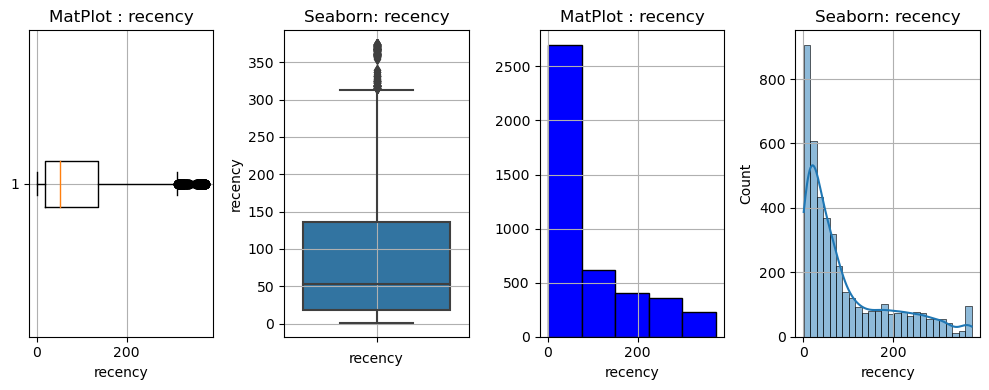

D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


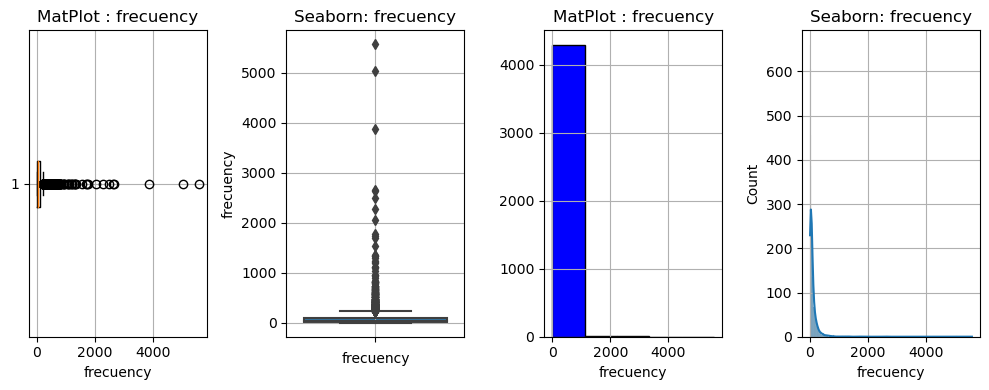

D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


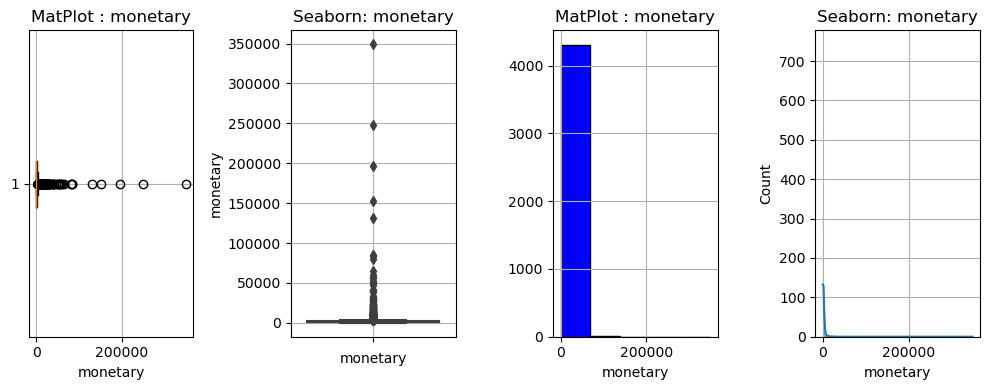

In [31]:
# Itero por columna de la tabla resumnen

for columna in ventas_rfm.columns.to_list():
    plt.figure(figsize=(10, 4))

    # grafico boxplot de matplotlib
    plt.subplot(1,4,1)
    plt.boxplot(ventas_rfm[columna], vert=False)
    plt.xlabel(columna)
    plt.title(f'MatPlot : {columna}')
    plt.grid(True)
    
    # grafico boxplot de seaborn
    plt.subplot(1,4,2)
    sns.boxplot(y=ventas_rfm[columna], ax=plt.gca())
    plt.xlabel(columna)
    plt.title(f'Seaborn: {columna}')
    plt.grid(True)

    # grafico histograma de matplotlib
    plt.subplot(1,4,3)
    plt.hist(ventas_rfm[columna], bins=5, color='blue', edgecolor='black')
    plt.xlabel(columna)
    plt.title(f'MatPlot : {columna}')
    plt.grid(True)

    # grafico histograma de seaborn
    plt.subplot(1,4,4)
    #plt.hist(ventas_rfm[columna], bins=5, color='blue', edgecolor='black')
    sns.histplot(data=ventas_rfm, x=columna, kde=True)
    plt.xlabel(columna)
    plt.title(f'Seaborn: {columna}')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
        

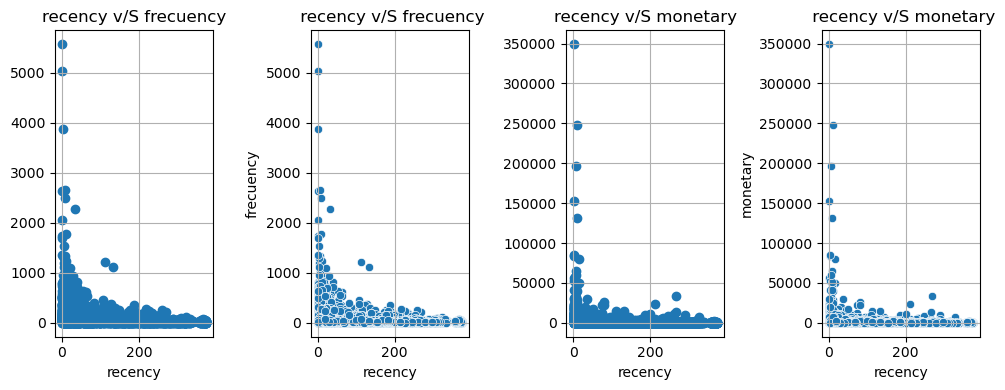

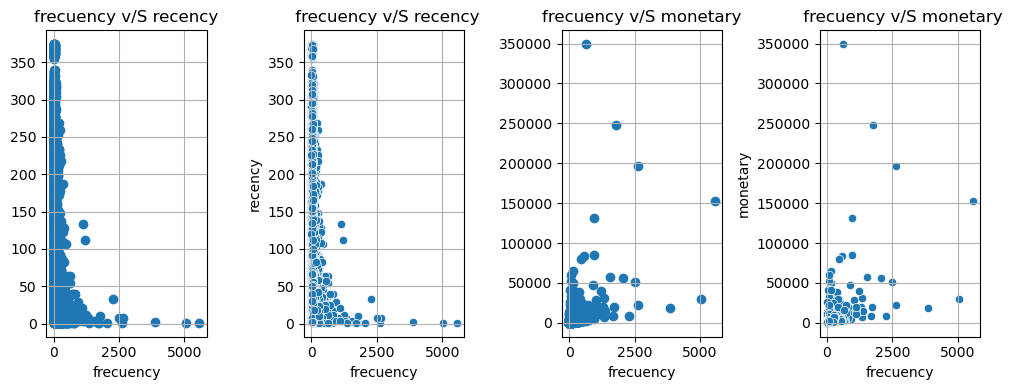

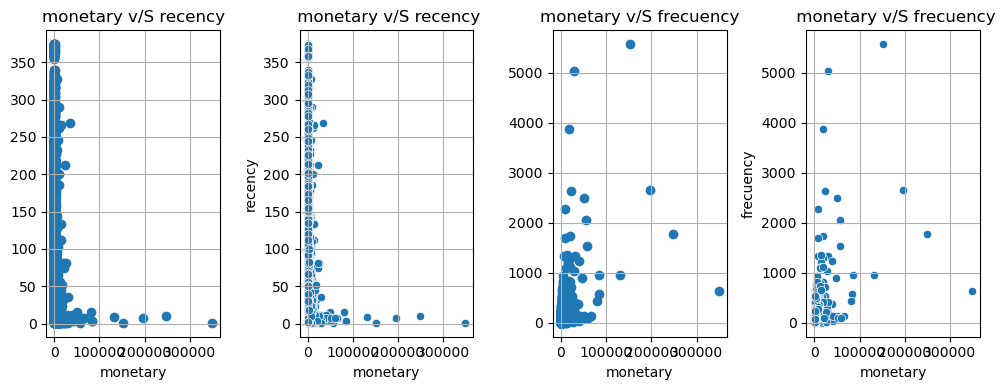

In [32]:
# Itero por columna de la tabla resumnen para dispersion
# Usando matplotlib

for columna in ventas_rfm.columns.to_list():
    plt.figure(figsize=(10, 4))
    posicion = 1
    for fila in ventas_rfm.columns.to_list():

        if columna != fila: 
            plt.subplot(1,4,posicion)
            plt.scatter(ventas_rfm[columna], ventas_rfm[fila])
            plt.xlabel(columna)
            plt.title(f'{columna} v/S {fila}')
            plt.grid(True)

            plt.subplot(1,4,posicion+1)
            sns.scatterplot(x=ventas_rfm[columna], y=ventas_rfm[fila])
            plt.xlabel(columna)
            plt.title(f' {columna} v/S {fila}')
            plt.grid(True)
                     
            posicion = posicion + 2
    plt.tight_layout()
    plt.show()

    

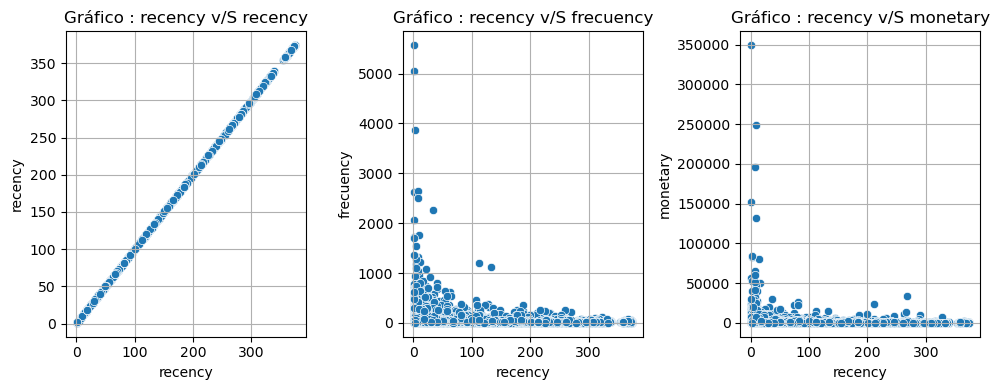

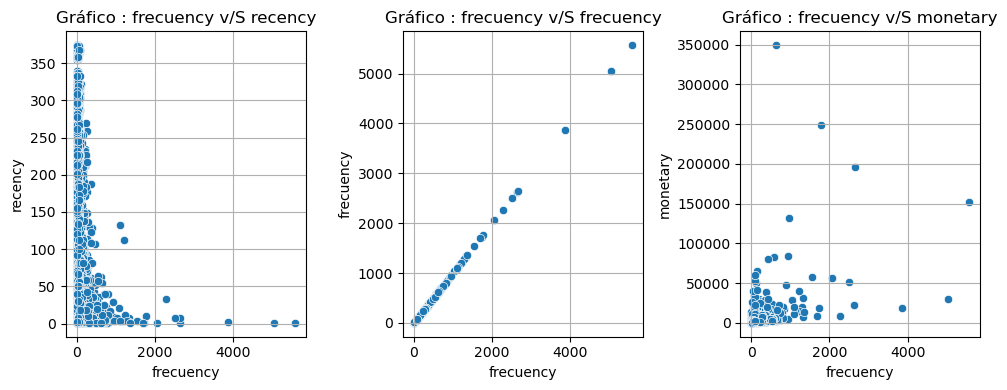

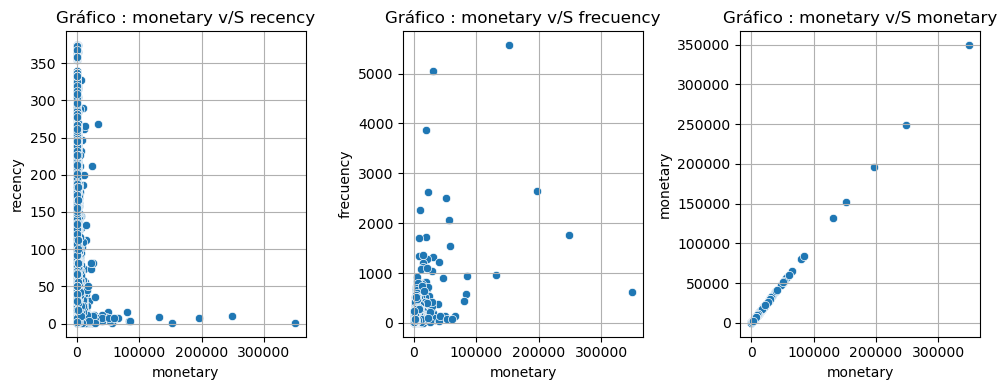

In [33]:
# Itero por columna de la tabla resumnen para dispersion
# Usando seaborn

for columna in ventas_rfm.columns.to_list():
    plt.figure(figsize=(10, 4))
    posicion = 1
    for fila in ventas_rfm.columns.to_list():
        
        plt.subplot(1,3,posicion)
        sns.scatterplot(x=ventas_rfm[columna], y=ventas_rfm[fila])
        plt.xlabel(columna)
        plt.title(f'Gráfico : {columna} v/S {fila}')
        plt.grid(True)
        posicion = posicion + 1
    plt.tight_layout()
    plt.show()


# 18. Pairplot

D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


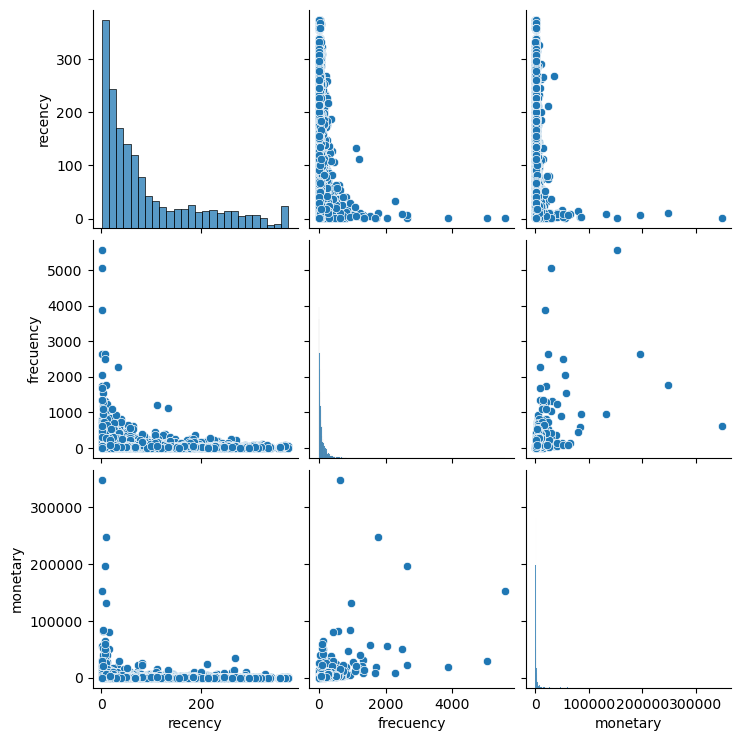

In [34]:
#Grafico pairplot
sns.pairplot(ventas_rfm)

# 19. matriz Correlación

In [35]:
matriz_np = np.corrcoef(ventas_rfm, rowvar=False)
matriz_pd = ventas_rfm.corr()

# 20. Heatmap ambas matrices de correlacion Pandas y Numpy

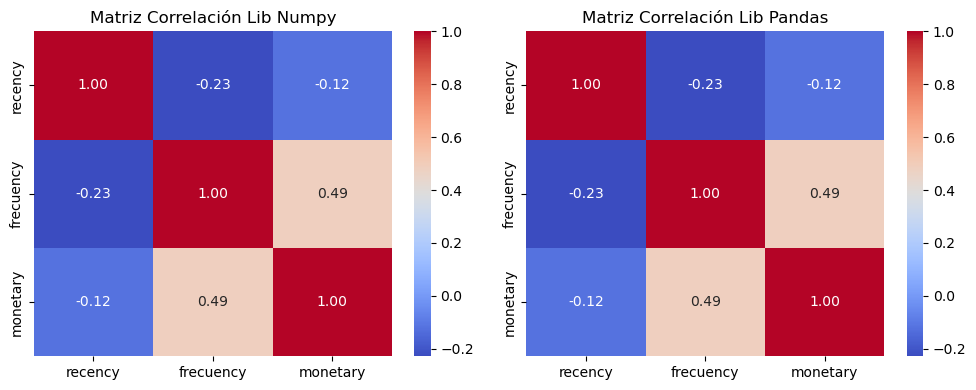

In [36]:
labels = ventas_rfm.columns.to_list()

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.heatmap(matriz_np, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.title('Matriz Correlación Lib Numpy')


plt.subplot(1,2,2)
sns.heatmap(matriz_pd, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz Correlación Lib Pandas')

plt.tight_layout()
plt.show()

# 21.- ESCALAMIENTO - NORMALIZACION 
# en este caso se aplica log1p y StandarScaler. ESto lleva a N(0,1)

In [37]:
#Preprocesando datos
ventas_log = np.log1p(ventas_rfm)

# Estandarizamos a N(1,0)
normalizador = StandardScaler()
normalizador.fit(ventas_log)
ventas_norm = normalizador.transform(ventas_log)


In [38]:
ventas_log

recency  frecuency  monetary
Customer ID                               
12346.0      5.111988   3.526361  5.923881
12347.0      1.386294   4.276666  7.188654
12348.0      4.317488   3.044522  5.407889
12349.0      3.784190   4.634729  7.890635
12351.0      2.484907   3.091042  5.710195
...               ...        ...       ...
18283.0      2.944439   5.442418  6.465787
18284.0      4.219508   3.367296  6.137036
18285.0      5.693732   2.564949  6.059123
18286.0      4.727388   4.219508  7.168141
18287.0      2.944439   4.454347  7.760770

[4312 rows x 3 columns]

In [39]:
ventas_norm

array([[ 0.96626221, -0.20074917, -0.54068849],
       [-1.90016471,  0.39421926,  0.44765077],
       [ 0.35500009, -0.58283141, -0.94390356],
       ...,
       [ 1.41383733, -0.96311758, -0.43500567],
       [ 0.67036355,  0.34889446,  0.43162059],
       [-0.7013791 ,  0.53511477,  0.89472225]])

In [40]:
ventas_norm_df = pd.DataFrame(ventas_norm,columns=labels,index=ventas_rfm.index)

# Supongamos que resumen_clientes es otro DataFrame con los índices que deseas conservar
# Reindexar el DataFrame resultado_normalizado para que coincida con los índices de resumen_clientes
ventas_norm_df = ventas_norm_df.reindex(ventas_rfm.index)

ventas_norm_df.head()

recency  frecuency  monetary
Customer ID                               
12346.0      0.966262  -0.200749 -0.540688
12347.0     -1.900165   0.394219  0.447651
12348.0      0.355000  -0.582831 -0.943904
12349.0     -0.055302   0.678152  0.996204
12351.0     -1.054928  -0.545943 -0.707671

In [41]:

import numpy as np
from sklearn.ensemble import IsolationForest

ventas_array = ventas_norm_df[['recency','frecuency','monetary']].values
ventas_array.size

# Definir los valores de contaminación dentro del rango válido
c = [0.01, 0.05, 0.1]

# Inicializar la matriz de resultados
resultados = np.zeros((len(c), ventas_array.size//3))

# Iterar sobre los valores de contaminación
for i in range(len(c)):
    # Crear y entrenar el modelo IsolationForest
    modelo = IsolationForest(contamination=c[i]).fit(ventas_array)
    
    # Predecir los valores atípicos y almacenarlos en la matriz de resultados
    resultados[i] = modelo.predict(ventas_array)
    columna='outlier-'+ str(c[i])
    ventas_norm_df[columna] = resultados[i]
                                  
suma_negativos_por_fila = np.sum(resultados < 0, axis=1)

ventas_norm_df[ventas_norm_df['outlier-0.01']==-1]
#df.drop(df.loc[df['Valor'] < 0].index)

recency  frecuency  monetary  outlier-0.01  outlier-0.05  \
Customer ID                                                              
12606.0      1.468816  -2.447397 -2.754371          -1.0          -1.0   
12748.0     -2.433450   3.248582  2.674269          -1.0          -1.0   
12846.0      1.468816  -2.447397 -2.975397          -1.0          -1.0   
12918.0      1.320299  -2.447397  2.098709          -1.0          -1.0   
13089.0     -1.728485   2.825549  3.399950          -1.0          -1.0   
13093.0     -1.195201   2.389961  3.238653          -1.0          -1.0   
13694.0     -1.195201   2.446565  4.040446          -1.0          -1.0   
13788.0      0.846117  -2.447397 -3.952233          -1.0          -1.0   
14031.0     -2.433450   1.980138  2.702201          -1.0          -1.0   
14095.0      1.559702  -2.447397 -4.096352          -1.0          -1.0   
14144.0      0.735603  -2.447397 -2.471402          -1.0          -1.0   
14156.0     -1.366880   3.253085  4.354916          -1.0          -1.0   
14298.0     -1.054928   2.643454  3.104260          -1.0          -1.0   
14527.0     -2.433450   2.915232  2.540650          -1.0          -1.0   
14576.0     -1.276261  -2.447397 -2.360897          -1.0          -1.0   
14580.0      0.913512  -2.447397 -3.010583          -1.0          -1.0   
14589.0     -1.366880  -1.897753 -2.272683          -1.0          -1.0   
14606.0     -2.121498   3.553062  2.516826          -1.0          -1.0   
14646.0     -1.121872   2.935148  4.537790          -1.0          -1.0   
14667.0     -2.433450   2.293669  2.213442          -1.0          -1.0   
14900.0      0.933115  -2.447397 -3.057834          -1.0          -1.0   
14911.0     -2.433450   3.842571  4.154751          -1.0          -1.0   
15040.0      1.019961  -2.447397 -3.498418          -1.0          -1.0   
15061.0     -1.900165   2.055444  3.683870          -1.0          -1.0   
15284.0      0.818538  -2.447397 -2.631379          -1.0          -1.0   
15311.0     -2.433450   3.052131  3.373761          -1.0          -1.0   
15760.0      1.331912  -2.125876  2.285773          -1.0          -1.0   
15768.0      0.670364   2.633055  2.343285          -1.0          -1.0   
15899.0     -1.728485  -1.720808 -2.007017          -1.0          -1.0   
15913.0      0.989094  -2.447397 -3.616426          -1.0          -1.0   
15999.0      1.587069  -2.447397 -2.775979          -1.0          -1.0   
16782.0     -2.433450   2.898557  1.868524          -1.0          -1.0   
17040.0      1.057910  -2.447397 -3.079070          -1.0          -1.0   
17339.0     -2.433450  -1.576233 -1.428704          -1.0          -1.0   
17377.0     -2.433450   2.723831  2.302557          -1.0          -1.0   
17378.0     -1.121872  -2.447397 -3.231290          -1.0          -1.0   
17448.0      0.801504   2.569038  2.320940          -1.0          -1.0   
17511.0     -1.900165   2.439080  3.695574          -1.0          -1.0   
17557.0      1.580840  -2.447397 -2.391546          -1.0          -1.0   
17816.0     -2.433450  -0.091953 -1.777856          -1.0          -1.0   
17841.0     -2.433450   3.763770  2.883185          -1.0          -1.0   
17850.0     -1.276261   3.207178  3.303826          -1.0          -1.0   
18102.0     -2.433450   2.111688  4.803881          -1.0          -1.0   
18113.0     -1.728485  -2.447397 -1.772176          -1.0          -1.0   

             outlier-0.1  
Customer ID               
12606.0             -1.0  
12748.0             -1.0  
12846.0             -1.0  
12918.0             -1.0  
13089.0             -1.0  
13093.0             -1.0  
13694.0             -1.0  
13788.0             -1.0  
14031.0             -1.0  
14095.0             -1.0  
14144.0             -1.0  
14156.0             -1.0  
14298.0             -1.0  
14527.0             -1.0  
14576.0             -1.0  
14580.0             -1.0  
14589.0             -1.0  
14606.0             -1.0  
14646.0             -1.0  
14667.0             -1.0  
14900.0        

In [42]:
ventas_norm_df.shape

(4312, 6)

In [51]:
ventas_norm_df.drop(ventas_norm_df.loc[ventas_norm_df['outlier-0.1'] < 0].index,inplace=True)

In [43]:
ventas_norm_df.shape

(4312, 6)

# Visualizacion gráfica de la normalizaciión Idem puntos anteriores

D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


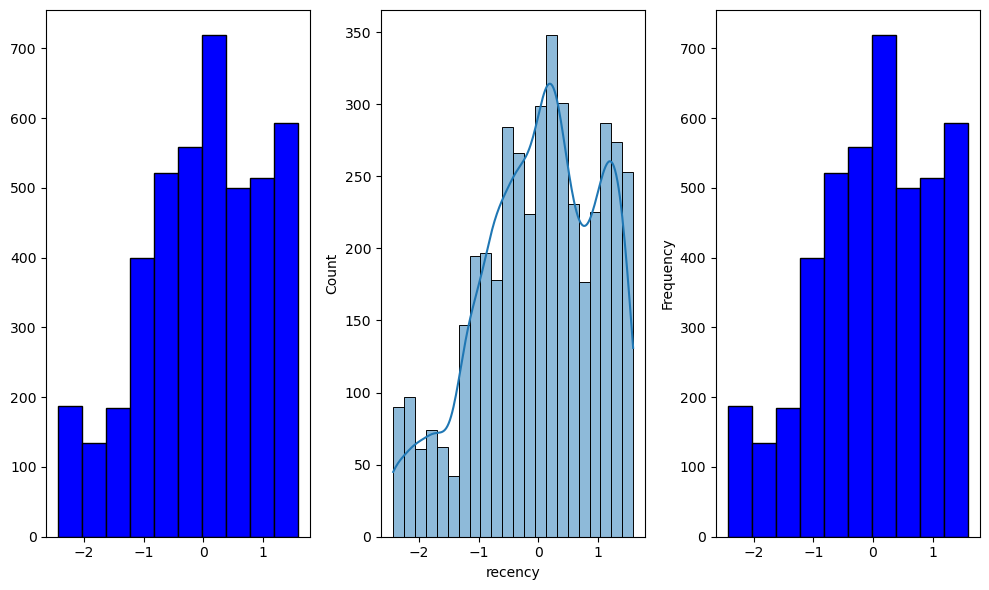

In [44]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.hist(ventas_norm_df['recency'], color='blue', edgecolor='black')


plt.subplot(1,3,2)
sns.histplot(data=ventas_norm_df, x='recency', kde=True)

plt.subplot(1,3,3)
ventas_norm_df.recency.plot(kind='hist', color='blue', edgecolor='black')

plt.tight_layout()
plt.show()

In [45]:
ventas_norm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4312 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recency       4312 non-null   float64
 1   frecuency     4312 non-null   float64
 2   monetary      4312 non-null   float64
 3   outlier-0.01  4312 non-null   float64
 4   outlier-0.05  4312 non-null   float64
 5   outlier-0.1   4312 non-null   float64
dtypes: float64(6)
memory usage: 235.8 KB


D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


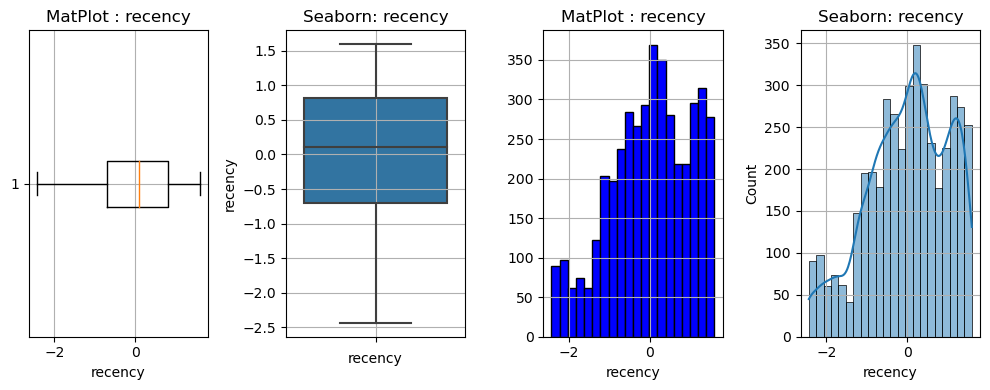

D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


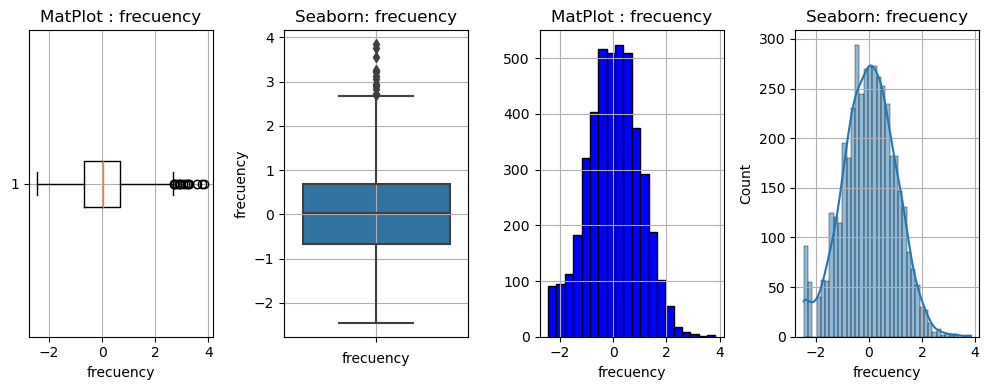

D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


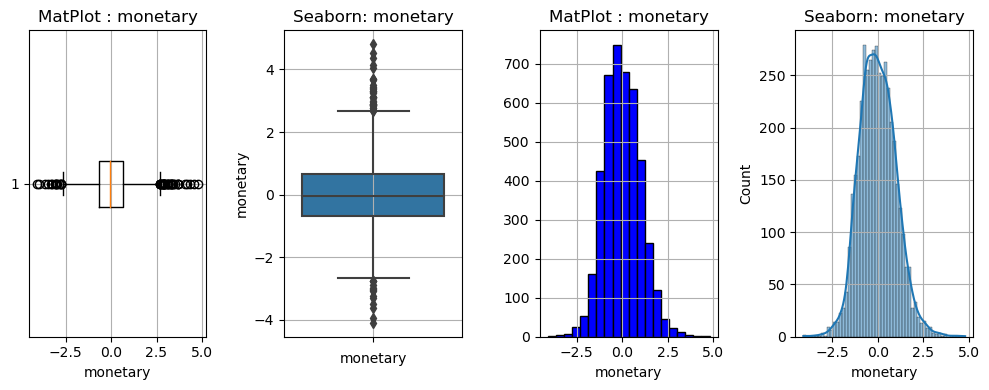

In [46]:
# Itero por columna de la tabla 
columnas_analisis = ['recency','frecuency','monetary']

for columna in columnas_analisis:
    plt.figure(figsize=(10, 4))

    # grafico boxplot de matplotlib
    plt.subplot(1,4,1)
    plt.boxplot(ventas_norm_df[columna], vert=False)
    plt.xlabel(columna)
    plt.title(f'MatPlot : {columna}')
    plt.grid(True)
    
    # grafico boxplot de seaborn
    plt.subplot(1,4,2)
    sns.boxplot(y=ventas_norm_df[columna], ax=plt.gca())
    plt.xlabel(columna)
    plt.title(f'Seaborn: {columna}')
    plt.grid(True)

    # grafico histograma de matplotlib
    plt.subplot(1,4,3)
    plt.hist(ventas_norm_df[columna], bins=20, color='blue', edgecolor='black')
    plt.xlabel(columna)
    plt.title(f'MatPlot : {columna}')
    plt.grid(True)

    # grafico histograma de seaborn
    plt.subplot(1,4,4)
    sns.histplot(data=ventas_norm_df, x=columna, kde=True)
    plt.xlabel(columna)
    plt.title(f'Seaborn: {columna}')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

<Figure size 1000x400 with 0 Axes>

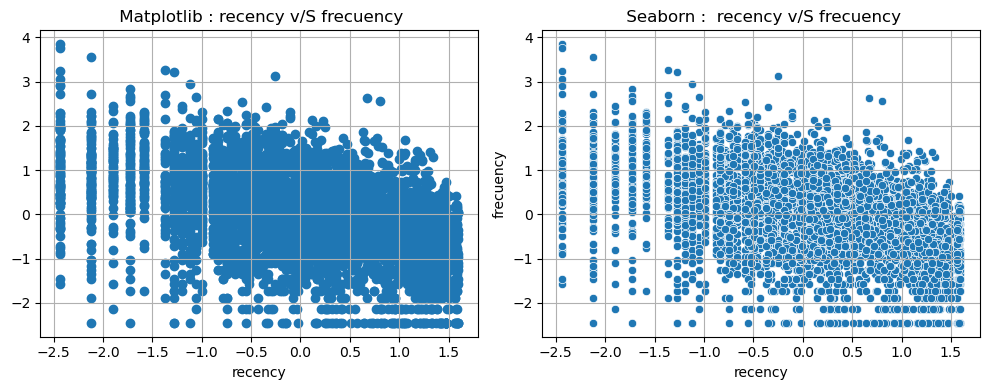

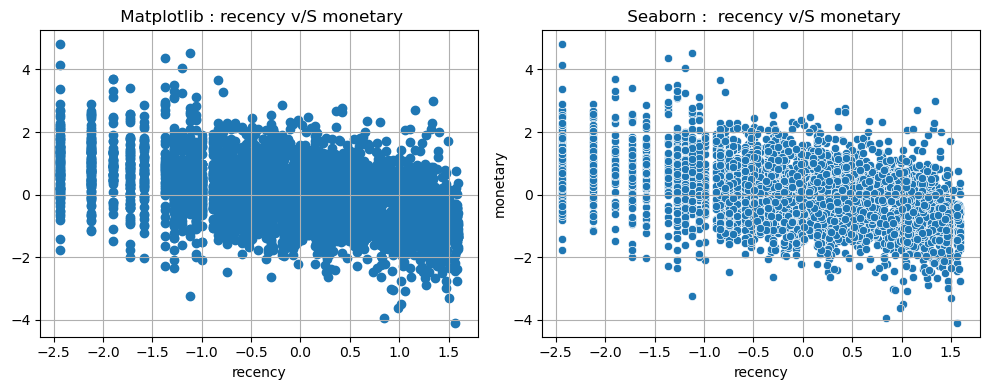

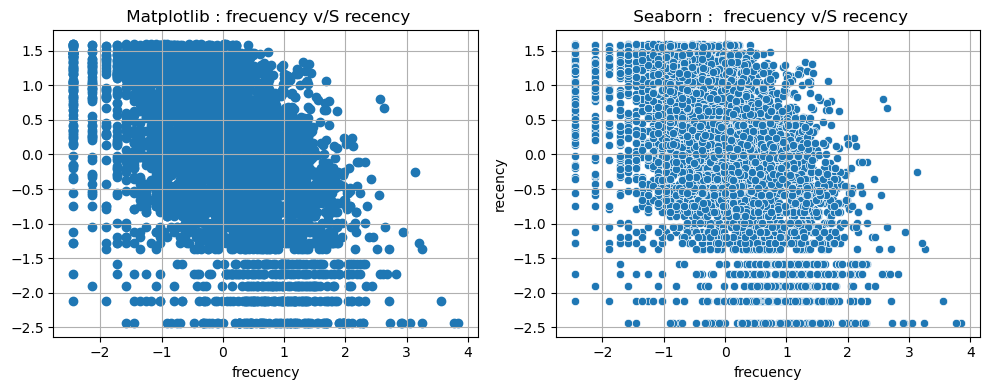

<Figure size 1000x400 with 0 Axes>

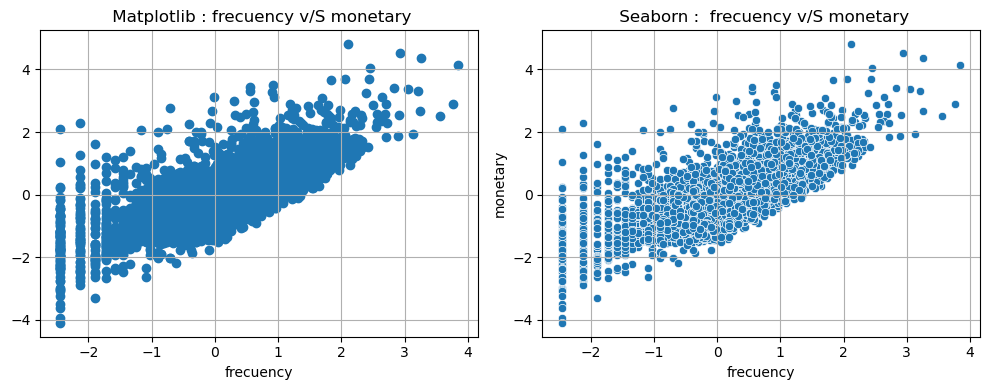

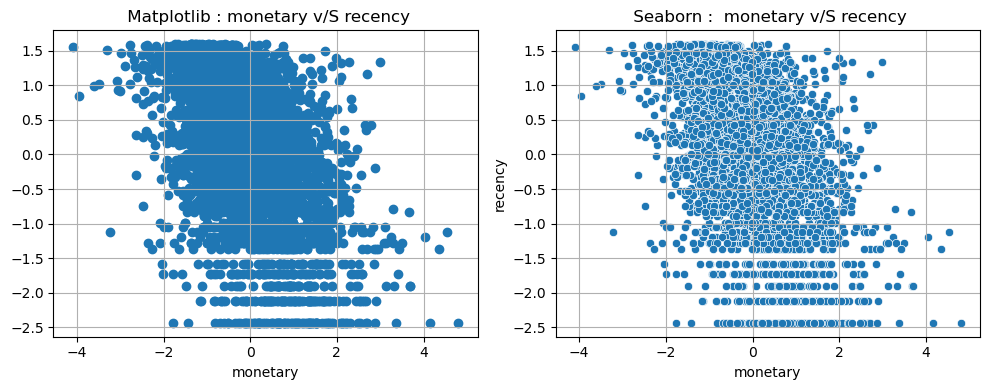

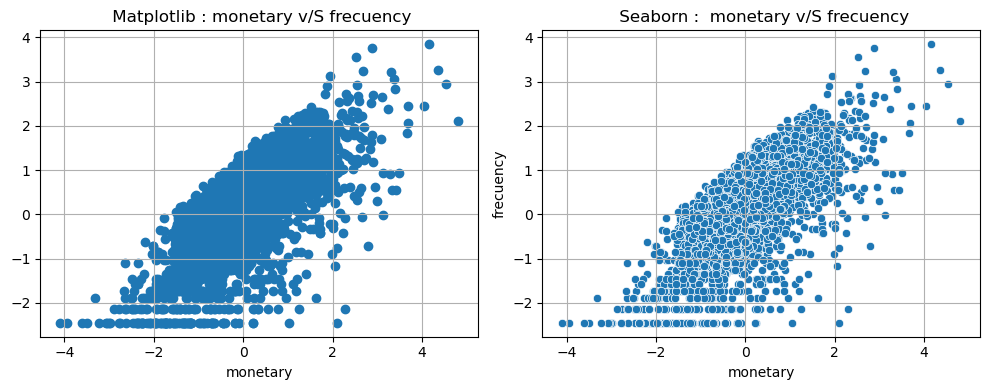

<Figure size 1000x400 with 0 Axes>

In [47]:
# Itero por columna de la tabla resumnen para dispersion
# Usando matplotlib

for columna in columnas_analisis:
  
    for fila in columnas_analisis:
        plt.figure(figsize=(10, 4))
        if columna != fila: 
            plt.subplot(1,2,1)
            plt.scatter(ventas_norm_df[columna], ventas_norm_df[fila])
            plt.xlabel(columna)
            plt.title(f' Matplotlib : {columna} v/S {fila}')
            plt.grid(True)

            plt.subplot(1,2,2)
            sns.scatterplot(x=ventas_norm_df[columna], y=ventas_norm_df[fila])
            plt.xlabel(columna)
            plt.title(f' Seaborn :  {columna} v/S {fila}')
            plt.grid(True)
                     
            plt.tight_layout()
            plt.show()

# 24 CLUSTERIZANDO K-means

In [48]:
#Suponemos 4 dieferentes cluster

kmeans = KMeans (n_clusters = 4, random_state= 1, n_init='auto')

kmeans.fit(ventas_norm_df)



KMeans(n_clusters=4, n_init='auto', random_state=1)

In [49]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3]), array([1678, 1627,  758,  249], dtype=int64))

In [50]:
wcss = []
for i in range(1,11):
    kmeans1 = KMeans (n_clusters = i, random_state= 1, n_init='auto', max_iter = 300)
    kmeans1.fit(ventas_norm_df)
    wcss.append(kmeans1.inertia_)

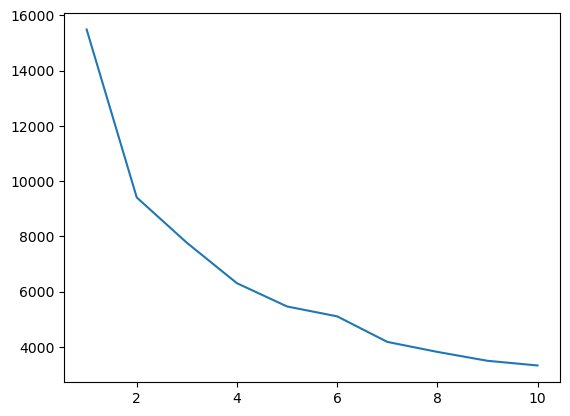

In [51]:
plt.plot(range(1,11),wcss)

In [52]:
pd.DataFrame(kmeans.cluster_centers_)

0         1         2         3         4         5
0 -0.107283  0.392017  0.329918  1.000000  1.000000  0.983294
1  0.677739 -0.669813 -0.725690  1.000000  1.000000  0.997546
2 -1.325620  1.220750  1.277732  0.941876  0.770145  0.558785
3  0.315604 -1.965193 -1.354663  0.823293 -0.036145 -1.000000

# 25  Sumo a los datos normalizados, la eqiqueta (labels_), generados.

In [53]:
ventas_norm_df['cluster'] = kmeans.labels_

#le debo indicar que esta nueva columna es categórica Nominal
ventas_norm_df['cluster'] = ventas_norm_df['cluster'].astype('category')

In [54]:
ventas_norm_df

recency  frecuency  monetary  outlier-0.01  outlier-0.05  \
Customer ID                                                              
12346.0      0.966262  -0.200749 -0.540688           1.0           1.0   
12347.0     -1.900165   0.394219  0.447651           1.0           1.0   
12348.0      0.355000  -0.582831 -0.943904           1.0           1.0   
12349.0     -0.055302   0.678152  0.996204           1.0           1.0   
12351.0     -1.054928  -0.545943 -0.707671           1.0           1.0   
...               ...        ...       ...           ...           ...   
18283.0     -0.701379   1.318623 -0.117224           1.0           1.0   
18284.0      0.279617  -0.326882 -0.374122           1.0           1.0   
18285.0      1.413837  -0.963118 -0.435006           1.0           1.0   
18286.0      0.670364   0.348894  0.431621           1.0           1.0   
18287.0     -0.701379   0.535115  0.894722           1.0           1.0   

             outlier-0.1 cluster  
Customer ID                       
12346.0              1.0       1  
12347.0              1.0       2  
12348.0              1.0       1  
12349.0              1.0       0  
12351.0              1.0       0  
...                  ...     ...  
18283.0              1.0       0  
18284.0              1.0       1  
18285.0              1.0       1  
18286.0              1.0       0  
18287.0              1.0       0  

[4312 rows x 7 columns]

In [55]:
ventas_norm_df #.drop(columns='cluster',inplace=True)

recency  frecuency  monetary  outlier-0.01  outlier-0.05  \
Customer ID                                                              
12346.0      0.966262  -0.200749 -0.540688           1.0           1.0   
12347.0     -1.900165   0.394219  0.447651           1.0           1.0   
12348.0      0.355000  -0.582831 -0.943904           1.0           1.0   
12349.0     -0.055302   0.678152  0.996204           1.0           1.0   
12351.0     -1.054928  -0.545943 -0.707671           1.0           1.0   
...               ...        ...       ...           ...           ...   
18283.0     -0.701379   1.318623 -0.117224           1.0           1.0   
18284.0      0.279617  -0.326882 -0.374122           1.0           1.0   
18285.0      1.413837  -0.963118 -0.435006           1.0           1.0   
18286.0      0.670364   0.348894  0.431621           1.0           1.0   
18287.0     -0.701379   0.535115  0.894722           1.0           1.0   

             outlier-0.1 cluster  
Customer ID                       
12346.0              1.0       1  
12347.0              1.0       2  
12348.0              1.0       1  
12349.0              1.0       0  
12351.0              1.0       0  
...                  ...     ...  
18283.0              1.0       0  
18284.0              1.0       1  
18285.0              1.0       1  
18286.0              1.0       0  
18287.0              1.0       0  

[4312 rows x 7 columns]

In [56]:
# Vuelvo a graficar pero ahora identificando con cluster

ventas_norm_df

recency  frecuency  monetary  outlier-0.01  outlier-0.05  \
Customer ID                                                              
12346.0      0.966262  -0.200749 -0.540688           1.0           1.0   
12347.0     -1.900165   0.394219  0.447651           1.0           1.0   
12348.0      0.355000  -0.582831 -0.943904           1.0           1.0   
12349.0     -0.055302   0.678152  0.996204           1.0           1.0   
12351.0     -1.054928  -0.545943 -0.707671           1.0           1.0   
...               ...        ...       ...           ...           ...   
18283.0     -0.701379   1.318623 -0.117224           1.0           1.0   
18284.0      0.279617  -0.326882 -0.374122           1.0           1.0   
18285.0      1.413837  -0.963118 -0.435006           1.0           1.0   
18286.0      0.670364   0.348894  0.431621           1.0           1.0   
18287.0     -0.701379   0.535115  0.894722           1.0           1.0   

             outlier-0.1 cluster  
Customer ID                       
12346.0              1.0       1  
12347.0              1.0       2  
12348.0              1.0       1  
12349.0              1.0       0  
12351.0              1.0       0  
...                  ...     ...  
18283.0              1.0       0  
18284.0              1.0       1  
18285.0              1.0       1  
18286.0              1.0       0  
18287.0              1.0       0  

[4312 rows x 7 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x400 with 0 Axes>

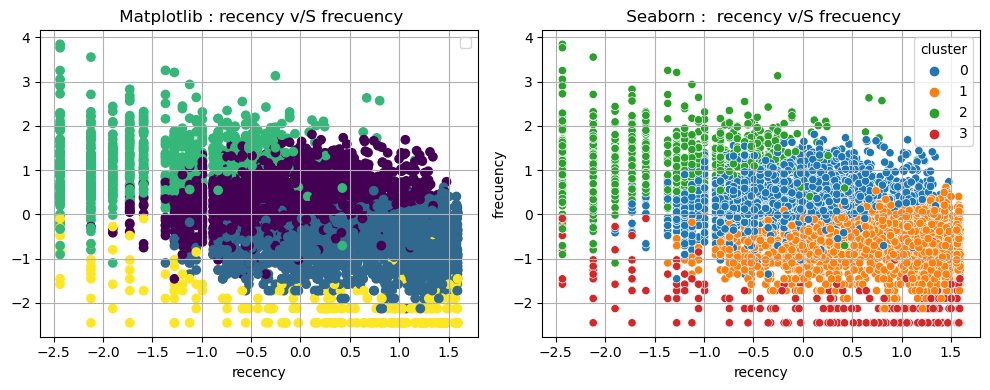

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


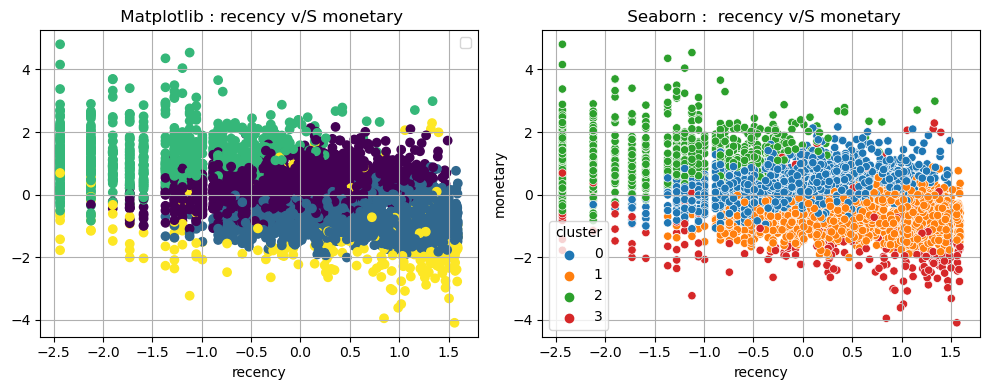

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


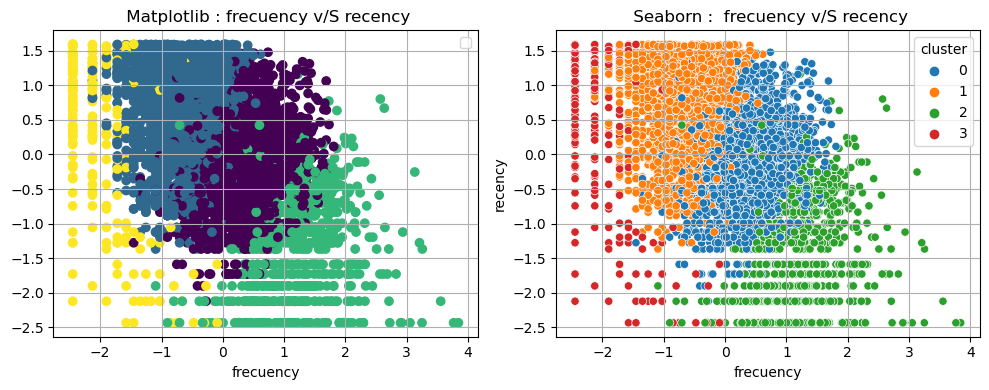

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x400 with 0 Axes>

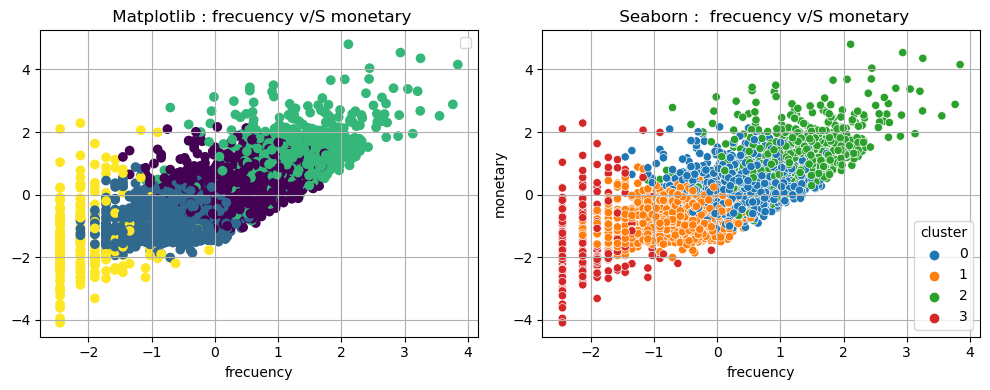

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


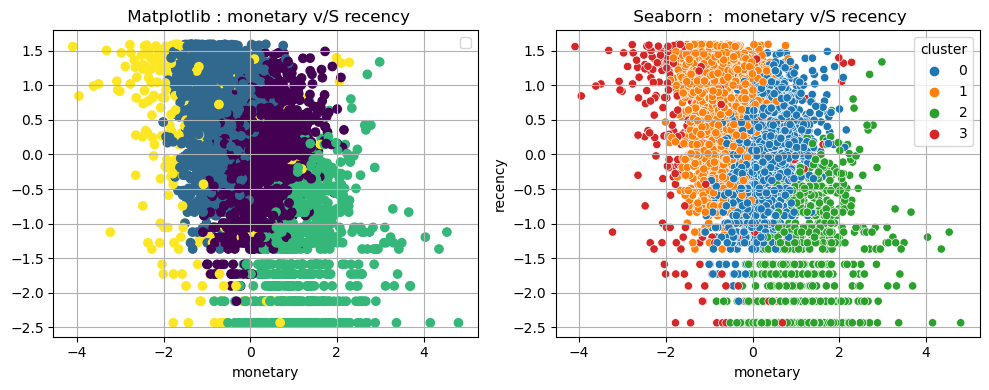

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


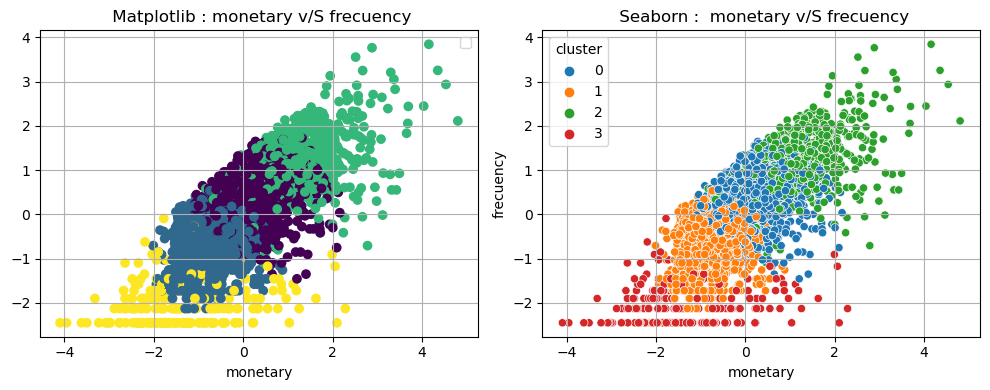

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x400 with 0 Axes>

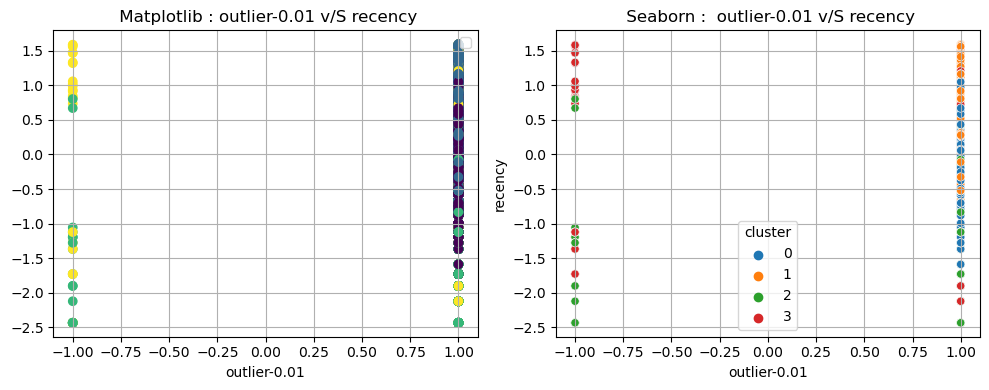

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


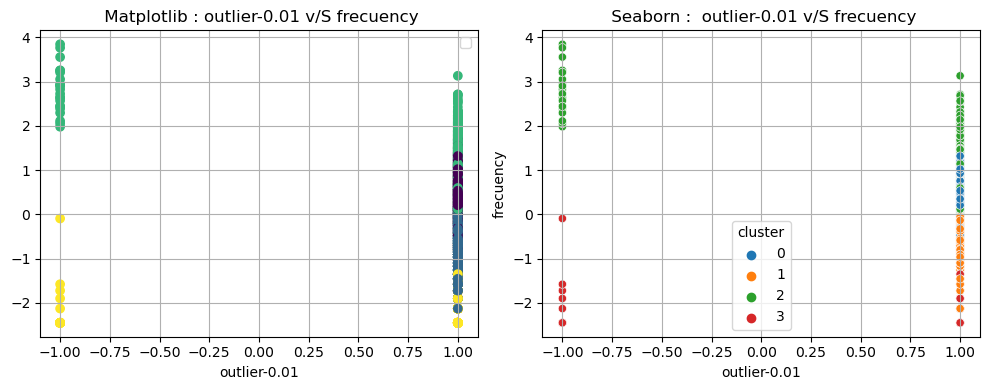

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


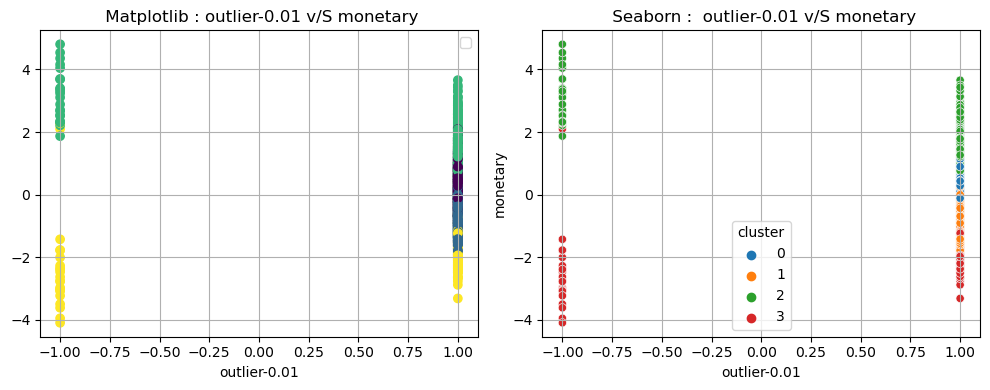

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


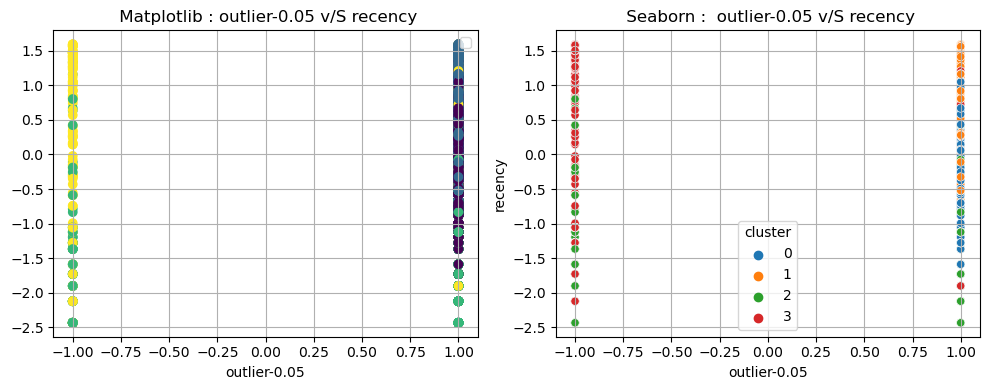

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


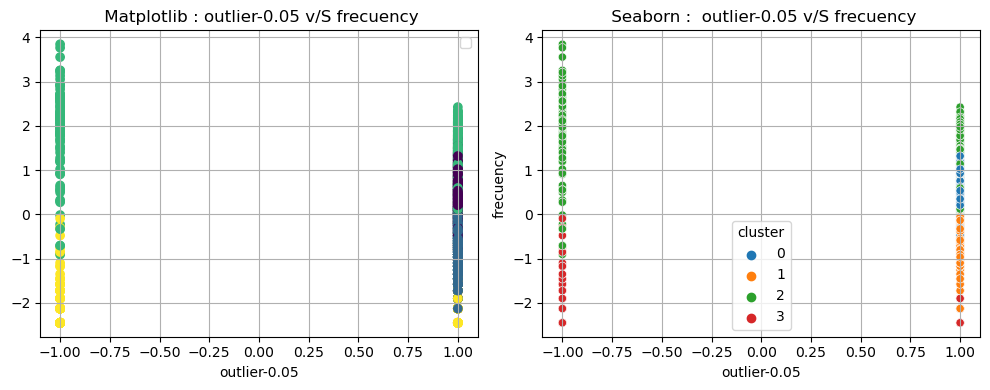

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


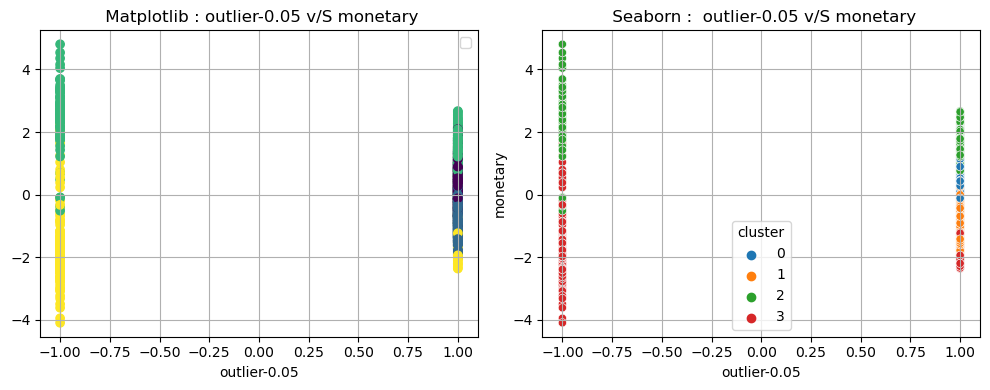

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


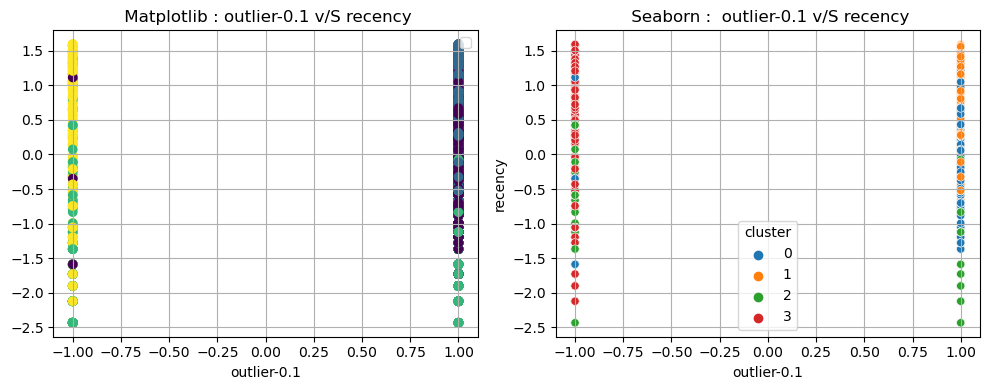

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


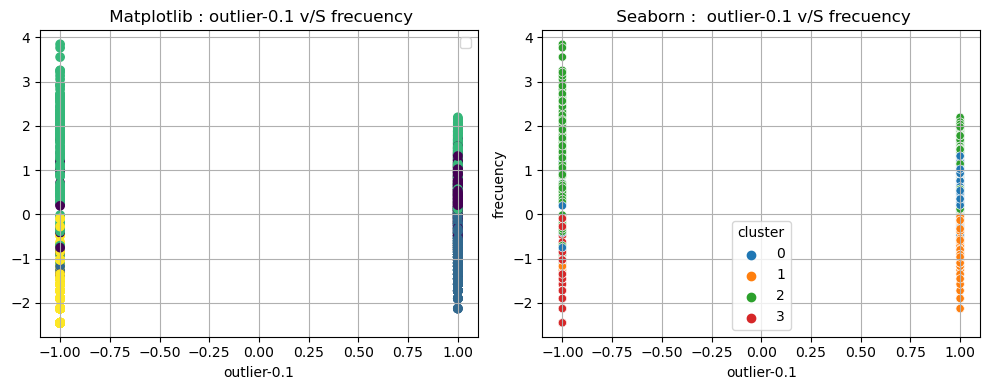

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


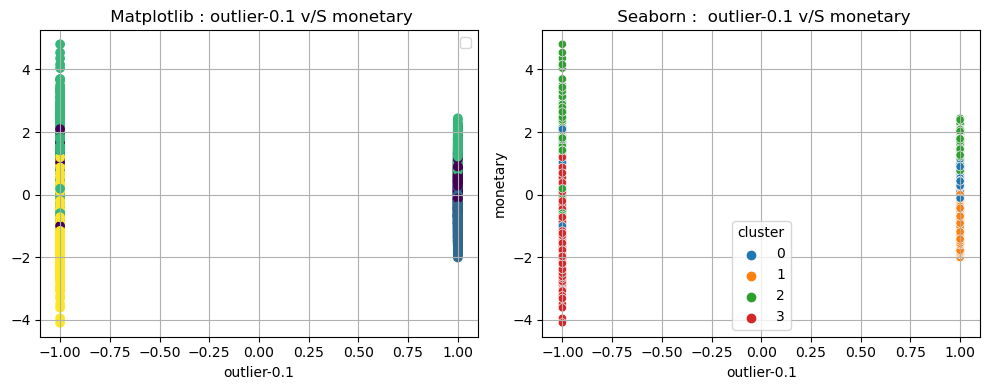

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


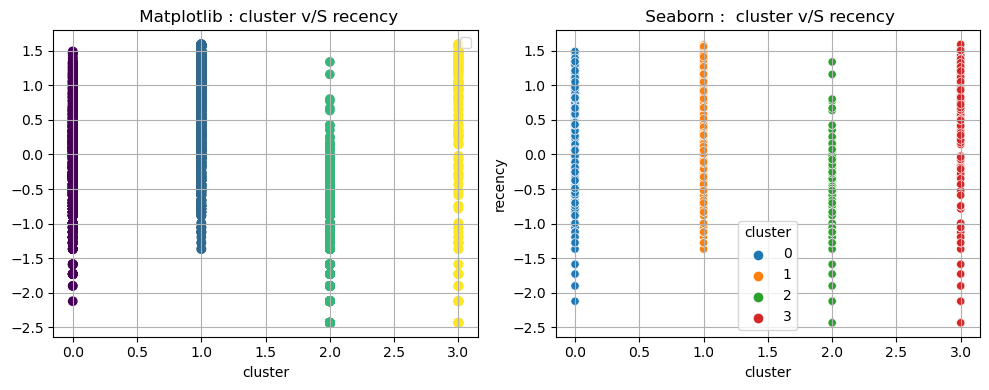

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


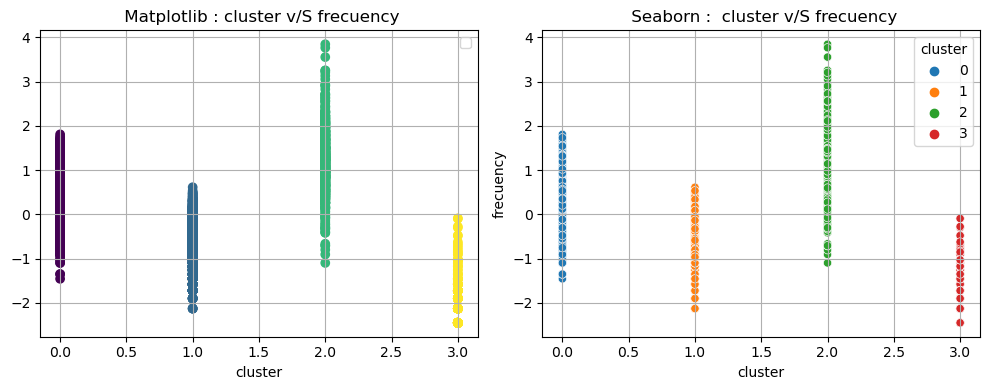

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


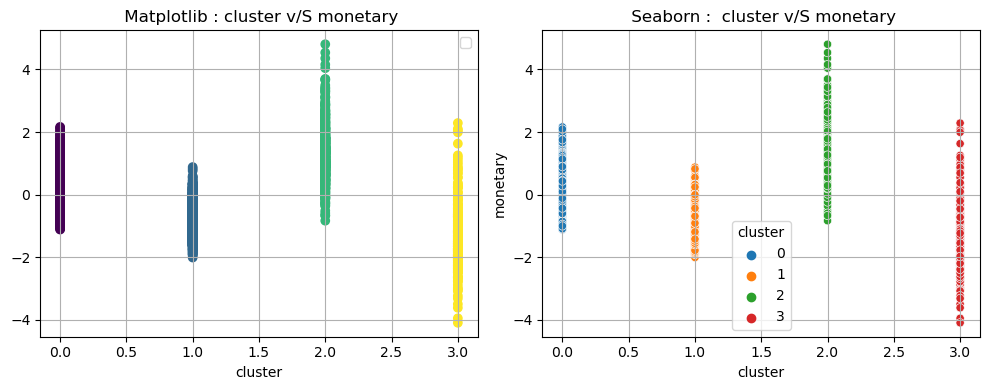

In [57]:
# Itero por columna de la tabla resumnen para dispersion
# Usando matplotlib

columnas_rfm = ventas_rfm.select_dtypes(include=[float, int]).columns.to_list()
for columna in ventas_norm_df.columns.to_list():
  
    for fila in columnas_rfm:
        plt.figure(figsize=(10, 4))
        if columna != fila: 
            plt.subplot(1,2,1)
            plt.scatter(ventas_norm_df[columna], ventas_norm_df[fila],c=ventas_norm_df['cluster'])
            plt.xlabel(columna)
            plt.title(f' Matplotlib : {columna} v/S {fila}')
            plt.legend()
            plt.grid(True)

            plt.subplot(1,2,2)
            sns.scatterplot(x=ventas_norm_df[columna], y=ventas_norm_df[fila], hue=ventas_norm_df['cluster'])
            plt.xlabel(columna)
            plt.title(f' Seaborn :  {columna} v/S {fila}')
            plt.grid(True)
                     
            plt.tight_layout()
            plt.show()

# 26 Le agrego ahora las etiquetas/cluster/labels_ a l atabla resumen

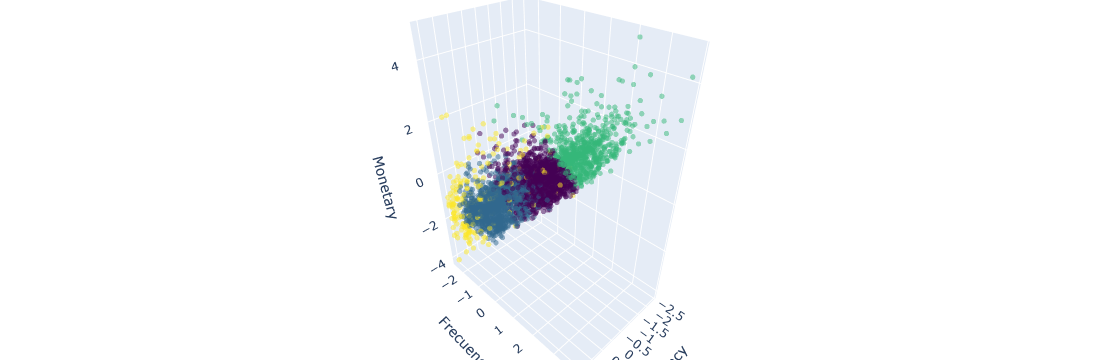

In [61]:

import plotly.graph_objects as go
from IPython.display import display


fig = go.Figure(data=[go.Scatter3d(
            x=ventas_norm_df['recency'],
            y=ventas_norm_df['frecuency'],
            z=ventas_norm_df['monetary'],
            mode='markers',
            marker=dict(size=3,color=ventas_norm_df['cluster'],colorscale='Viridis',opacity=0.5)
                )])

#tigh layout
fig.update_layout (margin=dict(l=0, r=0, b=0, t=0),
                   scene = dict(
                       xaxis_title='Recency', 
                       yaxis_title='Frecuency',
                       zaxis_title='Monetary'))
#plt.show()
                       

In [98]:
#ventas_rfm['cluster'] = kmeans.labels_
ventas_rfm
#le debo indicar que esta nueva columna es categórica Nominal
#ventas_rfm['cluster'] = ventas_rfm['cluster'].astype('category')

recency  frecuency  monetary
Customer ID                              
12346.0          165         33    372.86
12347.0            3         71   1323.32
12348.0           74         20    222.16
12349.0           43        102   2671.14
12351.0           11         21    300.93
...              ...        ...       ...
18283.0           18        230    641.77
18284.0           67         28    461.68
18285.0          296         12    427.00
18286.0          112         67   1296.43
18287.0           18         85   2345.71

[4312 rows x 3 columns]

In [89]:
ventas_rfm

recency  frecuency  monetary
Customer ID                              
12346.0          165         33    372.86
12347.0            3         71   1323.32
12348.0           74         20    222.16
12349.0           43        102   2671.14
12351.0           11         21    300.93
...              ...        ...       ...
18283.0           18        230    641.77
18284.0           67         28    461.68
18285.0          296         12    427.00
18286.0          112         67   1296.43
18287.0           18         85   2345.71

[4312 rows x 3 columns]

In [235]:
monto_total_venta = ventas_rfm['monetary'].sum()

ventas_rfm.groupby('cluster').agg({
                   'recency'  :  'mean',
                   'frecuency':  'mean',
                   'monetary' :  'sum',
                   'cluster'  : 'count'}
                 ).round(1).sort_values(by='recency')

C:\Users\victo\AppData\Local\Temp\ipykernel_15788\346393447.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_rfm.groupby('cluster').agg({


recency  frecuency   monetary  cluster
cluster                                        
2           13.9      275.8  5942368.8      903
3           25.1       35.8   543881.3      952
0           99.4       85.9  1993923.3     1225
1          190.6       15.7   351829.8     1232

In [226]:
ventas_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4312 entries, 12346.0 to 18287.0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   recency    4312 non-null   int64   
 1   frecuency  4312 non-null   int64   
 2   monetary   4312 non-null   float64 
 3   cluster    4312 non-null   category
dtypes: category(1), float64(1), int64(2)
memory usage: 139.1 KB


In [227]:
columnas_rfm = ventas_rfm.select_dtypes(include=[float, int]).columns.to_list()

D:\Programas\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


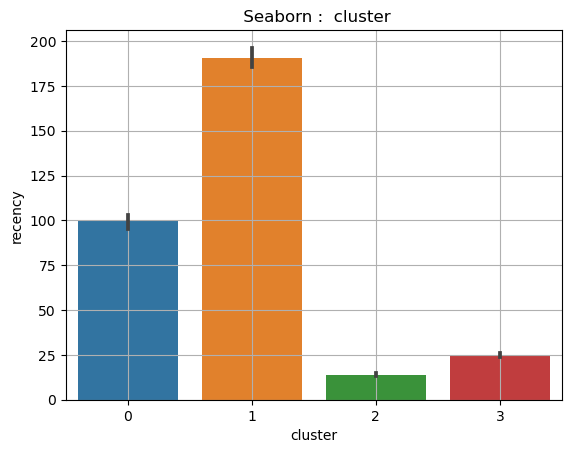

D:\Programas\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


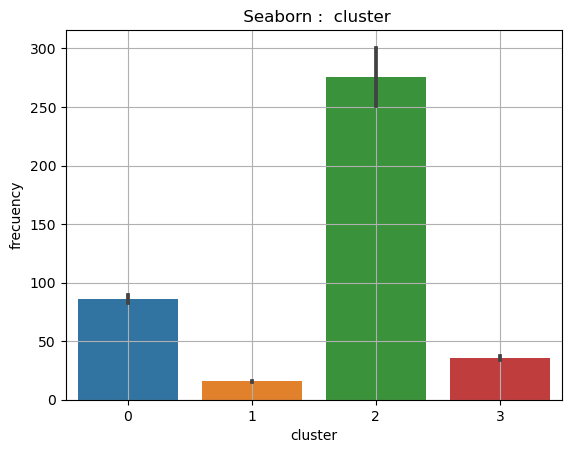

D:\Programas\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


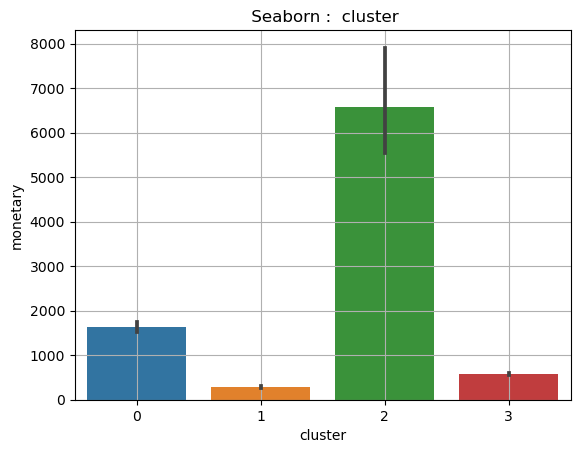

In [228]:
for variable in columnas_rfm:
    sns.barplot(data=ventas_rfm,x='cluster',y=variable)
    plt.xlabel(columna)
    plt.title(f' Seaborn :  {columna}')
    plt.grid(True)
    plt.show()

In [4]:
plt.bar(categorias, valores1, label='Grupo 1')
plt.bar(categorias, valores2, bottom=valores1, label='Grupo 2')

NameError: name 'plt' is not defined

In [327]:


import numpy as np
from sklearn.ensemble import IsolationForest

ventas_array = ventas_norm_df[['recency','frecuency','monetary']].values
ventas_array.size

# Definir los valores de contaminación dentro del rango válido
c = [0.01, 0.05, 0.1]

# Inicializar la matriz de resultados
resultados = np.zeros((len(c), ventas_array.size//3))

# Iterar sobre los valores de contaminación
for i in range(len(c)):
    # Crear y entrenar el modelo IsolationForest
    modelo = IsolationForest(contamination=c[i]).fit(ventas_array)
    
    # Predecir los valores atípicos y almacenarlos en la matriz de resultados
    resultados[i] = modelo.predict(ventas_array)
    columna='outlier-'+ str(c[i])
    ventas_norm_df[columna] = resultados[i]
                                  
suma_negativos_por_fila = np.sum(resultados < 0, axis=1)

ventas_norm_df[ventas_norm_df['outlier-0.01']==-1]
df.drop(df.loc[df['Valor'] < 0].index)

<Figure size 640x480 with 0 Axes>

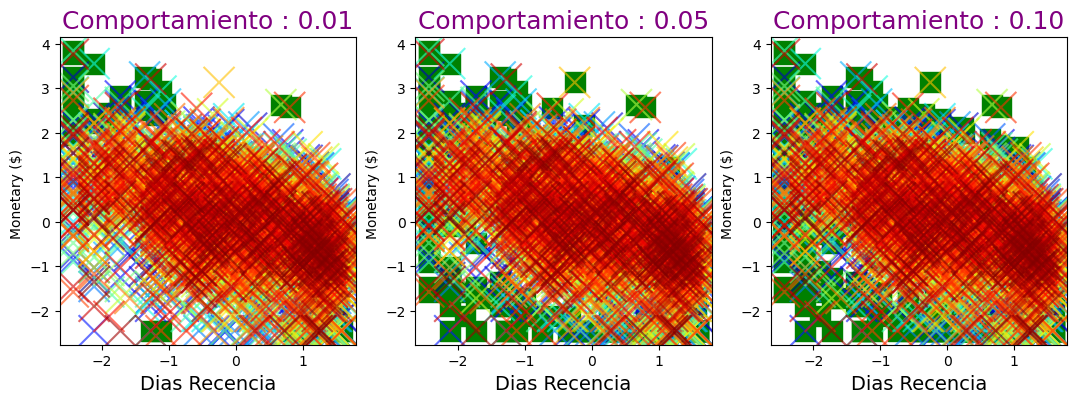

In [382]:
plt.set_cmap('jet')
fig = plt.figure(figsize=(13,4))

for i in range(len(c)):
    ax = fig.add_subplot(1,3,i+1)
    ax.scatter(ventas_array[resultados[i]==-1][:, 0],
               ventas_array[resultados[i]==-1][:, 1],
               c='green',s=200, marker='s')
    ax.scatter(ventas_array[:, 0],
               ventas_array[:, 1],
               c=range(ventas_array.size//3), marker='x', s=500, alpha=0.6)
    ax.set_title('Comportamiento : %0.2f' % c[i], size = 18, color = 'purple')
    ax.set_ylabel('Monetary ($) ', size=10)
    ax.set_xlabel('Dias Recencia', size = 14)

plt.show()


In [1]:
import numpy as np
from scipy.stats import shapiro

# Creamos una muestra de datos ficticia
datos = np.random.normal(loc=0, scale=1, size=100)

# Imprimimos la muestra de datos
print("Muestra de datos:", datos)


Muestra de datos: [-2.04672712 -0.66829341 -1.07985432  1.69712067 -0.37216416  0.1510265
 -0.15959933  0.7262433  -0.69146003  0.4179036   0.50084435 -0.65824142
 -0.30730942  0.25370351  0.15890572 -0.9544451  -1.13439954  0.10274607
  0.90455954  1.87422931 -0.16712104  0.6325468  -0.01563151 -0.72659375
 -0.07577616 -0.29419371 -0.81930533  1.55143644 -0.29689901  0.20910906
  1.46649073  0.07866519 -0.39128637 -0.13943164  1.59645471  0.18676436
  0.47654849 -0.19429637 -1.75145569  2.98945287 -1.8702853  -0.16724734
  0.43183069  1.43192811 -1.55056154 -0.62116751  0.13246477  1.16178528
 -1.42912193 -0.44800073  0.54001078 -1.25633689 -1.16520876  0.34570159
  1.84801593  0.34684311  0.44429504  2.10911169  0.01874056 -1.40107112
 -0.83364148 -1.0589187   0.48512669 -0.99777298  1.5890778   1.16488679
 -0.67546241 -0.1221767  -1.16767966  0.78594984  2.00103367 -1.10522338
  0.88528217  0.02624738 -0.91150809  0.28882065  1.42151558  0.86229854
 -1.15926571 -0.35476721  0.263705

In [2]:
# Aplicamos la prueba de Shapiro-Wilk
stat, p_valor = shapiro(datos)

# Imprimimos el resultado de la prueba
print("Estadístico de prueba:", stat)
print("Valor p:", p_valor)


Estadístico de prueba: 0.9871049523353577
Valor p: 0.4447198510169983


In [3]:
# Comprobamos si rechazamos o no la hipótesis nula
nivel_significancia = 0.05
if p_valor > nivel_significancia:
    print("No se rechaza la hipótesis nula. Los datos podrían provenir de una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los datos probablemente no provienen de una distribución normal.")


No se rechaza la hipótesis nula. Los datos podrían provenir de una distribución normal.


In [66]:
import numpy as np
from bokeh.plotting import figure, show

# Generar datos aleatorios
x = ventas_norm_df['recency']
y = ventas_norm_df['frecuency']


# Crear una nueva figura
p = figure(title="Gráfico de Dispersión Simple", x_axis_label='X', y_axis_label='Y')

# Agregar puntos al gráfico de dispersión
p.circle(x, y, size=8, color='navy', alpha=0.1)

# Mostrar el gráfico
show(p)


In [65]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

# Generar datos aleatorios
x = ventas_norm_df['recency']
y = ventas_norm_df['frecuency']
z = ventas_norm_df['monetary']

# Crear una nueva figura 3D
p = figure(title="Gráfico de Dispersión 3D", x_axis_label='X', y_axis_label='Y', z_axis_label='Z', output_backend="webgl")

# Crear fuente de datos
source = ColumnDataSource(data=dict(x=x, y=y, z=z))

# Agregar puntos al gráfico de dispersión
p.scatter(x='x', y='y', z='z', size=8, source=source, color='navy', alpha=0.5)
p.scatter(x='x', y='y', size=8, source=source, color='navy', alpha=0.5)

# Mostrar el gráfico
show(p)


AttributeError: unexpected attribute 'z_axis_label' to figure, similar attributes are y_axis_label, x_axis_label or y_axis_type

In [2]:
# Creando un dataset de ejemplo 
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4)

# Importando el modelo
from sklearn.linear_model import LogisticRegression

rlog = LogisticRegression() # Creando el modelo

# Dividiendo el dataset en entrenamiento y evaluacion
X_entrenamiento = X[:-200]
X_evaluacion = X[-200:]
y_entrenamiento = y[:-200]
y_evaluacion = y[-200:]

rlog.fit(X_entrenamiento, y_entrenamiento) #ajustando el modelo

# Realizando las predicciones
y_predic_entrenamiento = rlog.predict(X_entrenamiento) 
y_predic_evaluacion = rlog.predict(X_evaluacion)

# Verificando la exactitud del modelo
entrenamiento = (y_predic_entrenamiento == y_entrenamiento).sum().astype(float) / y_entrenamiento.shape[0]
print("sobre datos de entrenamiento: {0:.2f}".format(entrenamiento))
evaluacion = (y_predic_evaluacion == y_evaluacion).sum().astype(float) / y_evaluacion.shape[0]
print("sobre datos de evaluación: {0:.2f}".format(evaluacion))



sobre datos de entrenamiento: 0.94
sobre datos de evaluación: 0.93


In [6]:
(y_predic_entrenamiento == y_entrenamiento).sum().astype(float)

752.0

In [17]:
 y_evaluacion.shape

(200,)

[[ 83   7]
 [  8 102]]


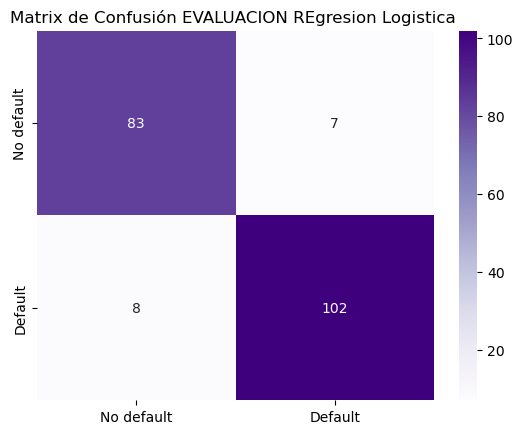

Accuracy: 0.925
[[383  28]
 [ 20 369]]


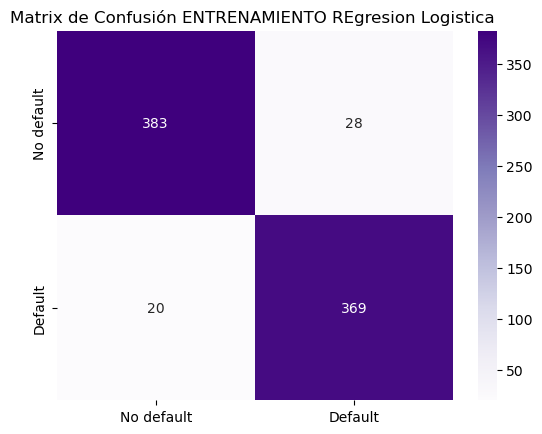

Accuracy: 0.94


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
import seaborn as sns


conf_matrix = metrics.confusion_matrix(y_evaluacion, y_predic_evaluacion)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['No default', 'Default'], yticklabels=['No default', 'Default'])
#plt.title(f'Matrix de Confusión {name}')
plt.title(f'Matrix de Confusión EVALUACION REgresion Logistica ')
plt.show()

accuracy = accuracy_score(y_evaluacion, y_predic_evaluacion)
print("Accuracy:", accuracy)

conf_matrix = metrics.confusion_matrix(y_entrenamiento, y_predic_entrenamiento)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['No default', 'Default'], yticklabels=['No default', 'Default'])
#plt.title(f'Matrix de Confusión {name}')
plt.title(f'Matrix de Confusión ENTRENAMIENTO REgresion Logistica ')
plt.show()
accuracy = accuracy_score(y_entrenamiento, y_predic_entrenamiento)
print("Accuracy:", accuracy)

D:\Programas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\Programas\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


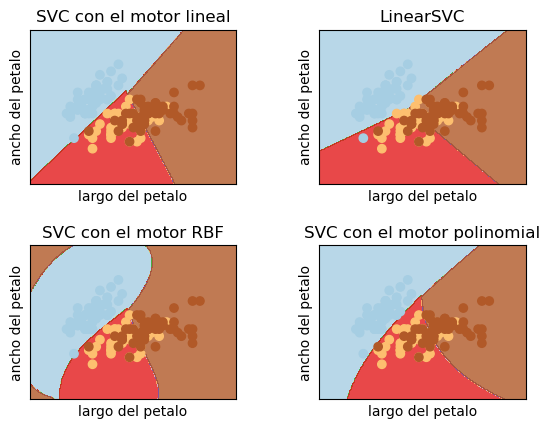

NameError: name 'SVM' is not defined

In [22]:
# importando SVM
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification

# importando el dataset iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # solo tomamos las primeras 2 características
y = iris.target

h = .02  # tamaño de la malla del grafico

# Creando el SVM con sus diferentes métodos
C        = 1.0  # parametro de regulacion SVM 
svc      = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc  = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc  = svm.LinearSVC(C=C).fit(X, y)

# crear el area para graficar
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# titulos de los graficos
titles = ['SVC con el motor lineal',
          'LinearSVC',
          'SVC con el motor RBF',
          'SVC con el motor polinomial']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Realizando el gráfico, se le asigna un color a cada punto
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Graficando tambien los puntos de datos
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('largo del petalo')
    plt.ylabel('ancho del petalo')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()




In [26]:
# Creando el dataset iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# importando KNN 
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor(n_neighbors=10) # Creando el modelo con 10 vecinos
knnr.fit(X, y) # Ajustando el modelo
y_knn_predic = knnr.predict(X)
# Verificando el error medio del modelo
print("El error medio del modelo es: {:.2f}".format(np.power(y - knnr.predict(X),
2).mean()))




El error medio del modelo es: 0.02


In [27]:
from sklearn.preprocessing import PolynomialFeatures

# Supongamos que tenemos un conjunto de características X
X = [[1, 2], [3, 4], [5, 6]]

# Creamos un objeto PolynomialFeatures
poly = PolynomialFeatures(degree=2)

# Transformamos las características originales en características polinomiales
X_poly = poly.fit_transform(X)

# Ahora X_poly contendrá las características originales y las combinaciones polinomiales hasta grado 2
print(X_poly)


[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]
 [ 1.  5.  6. 25. 30. 36.]]
